<a href="https://colab.research.google.com/github/Deepte01/HeartDiseasePredictionModel/blob/master/A4_Teegapuram_Deepika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><u><center>Exploratory Data Analysis on Heart Disease</center></u></h2>
<i><h5><center>Name: Deepika Teegapuram, Email: dteegapuram@gmail.com</center></h5></i>

<h2>Part-A : Reason for choosing this Dataset</h2>
<p> Various underlying factors cause heart disease in humans.  Even today, only some heart diseases have a medical cure. It is interesting to predict a heart disease when the health condition of a person is known. This interest has motivated to select the dataset published by the UCI Machine Learning repository, which depicts an instance of the Clevland Database. <p>

<h2>Part-B : Obtaining the Data</h2>
<p>The data downloaded from the UCI repository is in .csv format. It is then imported into google drive manually. The google colab notebook imports this file by connecting to the google drive using the drive.mount() function. This function returns a URL and an input field for accepting an authentication code. Click on the URL and copy the auth code and paste in the input field. Once the connection is successful, the gdrive section of google colab can access all the folders and files of google drive. Navigate to the directory which has the dataset in the gdrive and retrieve the file path and provide it as an input in the read_csv() method.<p>

In [ ]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler,StandardScaler


from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
from sklearn.metrics import classification_report 

from sklearn import metrics

from google.colab import drive


warnings.filterwarnings('ignore')

In [ ]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd gdrive

/content/gdrive


In [ ]:
cd My\ Drive

/content/gdrive/My Drive


The data is loaded into the pandas dataframe for further analysis.

In [ ]:
df = pd.read_csv('HeartDataSet/Cleveland_Data.csv') 

<h2>Part-C : Scrubbing and Fomatting the Data</h2>


Before we start with scrubbing and formatting the data, we need to have an overview of the number of instances in the data and the total number of features it has. With the help of the shape attribute of numpy, we can have an overview.

In [ ]:
df.shape


(303, 14)

Let's print the names of features which the data have using columns attribute of numpy

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

Lets check if there are any null values in the instances.

In [ ]:
df.isnull().values.any()
# There are no null values in the data.

False

From the thorough observation of data, we can observe there are "?" symbols in some features. We need to find such instances and delete them using the following code.

In [ ]:
indexNumbers = list()
#df.iloc[:,:]
for i in df.columns:
  index_list=df.index[df[i]=='?']
  if(len(index_list)>0):
    #indexNumbers.append(index_list.values.tolist())
    for el in index_list.values.tolist():
      df.drop(el,inplace=True)
      print(el)
# the below printed rows are deleted from the data frame.

166
192
287
302
87
266


In [ ]:
# After deleting rows which has ? symbol, the shape is decreased from 303 to 297
df.shape

(297, 14)

Now that the data is filtered, it is time to explore the features in the dataset. There are 14 features, but their name is not self-explanatory. We need to rename the fields based on the documentation provided by the UCI repository.

In [ ]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


Once we do with the modification of column names into more meaningful names, it is time to explore each feature to identify which are continuous values and which are categorical.

<h2>Part-D : Exploratory Data Analysis</h2>

<h3>Feature Exploration:</h3>

Before we start with determining the relationships between the features, we need to have some domain knowledge about heart disease. The article (Bhf.org.uk, 2019) says that High cholesterol, High Blood pressure, High sugar levels, and family history are the major risk factors for causing heart disease.

Note that, **thalassemia** is the only feature in our data set which is **hereditary**.

According to an article(www.heart.org, n.d.), Age, Gender, and Hereditary are the significant factors of causing heart disease, and these factors cannot be changed. The secondary factors such as high cholesterol levels, High blood pressure, Physical inactivity, and Diabetes can be changed, treated, and controlled.

Apart from these features, the dataset has some features that are related to **Angina.**

**What is Angina?**
<p>Angina is a pain or discomfort caused in the heart due to a temporary block of oxygen and blood to the heart. </p>

In this dataset, the chest pain is of four types.

1. Typical Angina: This type of pain arises due to the accumulation of plaque in the arteries.
2. Atypical Angina: This type of pain arises from emotional stress.
3. Non-Anginal pain: This type of chest pain lasts from 5 to 30  minutes. However, this pain can be relieved immediately by lying down.
4. Asymptomatic pain: A patient carrying an Asymptotic pain does not have any symptoms or unrecognized symptoms of heart pain. It is also called a silent heart attack.

The following are the tests applied to the patients and a description of what each test does.

1.  <B> restecg (resting electrocardiographic test):</B>  This is a test that records the electrical activity of the heart when the body is resting. The following are the results of this test.
     

        *  Normal: No disturbance in the heart activity
        *  ST-T abnormality: It shows the existence of heart disease with a T wave
        *  Left ventricular hypertrophy: It means the left ventricle is working hard to 
       Pump the blood and oxygen. It is common in people who have high blood pressure.


2.   <B>slope</B>:This is the slope of the peak in exercise ST-segment after 9 - 12 minutes of exercise. It is also called a Stress Test that is, the activity of the heart during physical activity.

3. <b>Excersie Induced Angina</b> : The chest pain caused during physical exercise.

4. <b>ca (number of major vessels (0-3) colored by flourosopy):</b> It is an X-ray beam which is passed into the body and transmits the image of the organs in a monitor.

Now we have some knowledge of the data, let us know how these features are related to heart disease.







Firstly, we need to use the info() method of pandas to find which columns are categorical and which columns are numerical, i.e., the data type of each feature.

Usually, the columns with the type object are considered to be categorical. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age                        297 non-null int64
sex                        297 non-null int64
chest_pain_type            297 non-null int64
resting_blood_pressure     297 non-null int64
cholesterol                297 non-null int64
fasting_blood_sugar        297 non-null int64
rest_ecg                   297 non-null int64
max_heart_rate_achieved    297 non-null int64
exercise_induced_angina    297 non-null int64
st_depression              297 non-null float64
st_slope                   297 non-null int64
num_major_vessels          297 non-null object
thalassemia                297 non-null object
target                     297 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 34.8+ KB


Although only three features represented as categorical in the info(), the source documentation declares the following columns are categorical as follows:</br>
sex:

          Value 0 : Female
          Value 1: Male

chest_pain_type: 

           Value 1: typical angina
           Value 2: atypical angina
           Value 3: non-anginal pain
           Value 4: asymptomatic

rest_ecg: 
  
            Value 0: normal
            Value 1: ST-T abnormality
            Value 2: probable or definite left ventricular hypertrophy
            
st_slope:

            Value 1: upsloping
            Value 2: flat
            Value 3: down sloping
            
exercise_induced_angina:

           Value 0: no
           Value 1: yes
           
thalassemia:

            Value 3: normal
            Value 6: fixed defect
            Value 7: Reversible defect
          
fasting_blood_sugar:
    
            Value 0: less than  or equal to 120 mg/dl 
            Value 1: greater than 120 mg/dl 
           
target: 
  
            Value 0: No disease
            Values 1,2,3,4: Number of Vessels which caused heart disease
            
num_major_vessels:  0-3 (vessels coloured by the Flouroscopy)

There are eight categorical columns and six continuous (numerical) columns, and we have to find the relationship among them.

Let us look at one categorical feature and see how many unique values it has.

In [ ]:
print(df['st_slope'].unique().tolist())
#st_slope has three categories i.e, 3,2,1

[3, 2, 1]


By converting the above discussed features to the category type can improve the processing time.

In [ ]:
for col in ['sex', 'chest_pain_type', 'rest_ecg', 'st_slope','exercise_induced_angina','thalassemia','fasting_blood_sugar','num_major_vessels','target']:
    df[col] = df[col].astype('object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age                        297 non-null int64
sex                        297 non-null object
chest_pain_type            297 non-null object
resting_blood_pressure     297 non-null int64
cholesterol                297 non-null int64
fasting_blood_sugar        297 non-null object
rest_ecg                   297 non-null object
max_heart_rate_achieved    297 non-null int64
exercise_induced_angina    297 non-null object
st_depression              297 non-null float64
st_slope                   297 non-null object
num_major_vessels          297 non-null object
thalassemia                297 non-null object
target                     297 non-null object
dtypes: float64(1), int64(4), object(9)
memory usage: 34.8+ KB


Let us concentrate on the target feature. It has five categories. Class 0 for no heart disease and classes 1,2,3,4 are the number of valves responsible for causing heart disease. Therefore, we can merge classes 1,2,3,4 into class 1, which represents a heart disease without considering how many valves are responsible for it.

It will be useful for predicting heart disease.

In [ ]:
df['target'].replace([0,1,2,3,4],[0,1,1,1,1],inplace=True)


Now let us know the summary of the data which gives us the min, max, and other statistical values of the features.

In [ ]:
df.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556
std,9.049736,17.762806,51.997583,22.941562,1.166123
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000
75%,61.000000,140.000000,276.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


Let us take a look at the first five rows of the data frame.

In [ ]:
df.head()
# all the target rows are changed in to 0's and 1's

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


The data is clear and there is no anamolous instances present. We can go with the further analysis. 

Now, let us find the relation between numerical-to-categorical data i.e., the relation between 

age                   
resting_blood_pressure    
cholesterol                
fasting_blood_sugar        
max_heart_rate_achieved    
st_depression        

with the target column.      

Text(0.5, 1.0, 'Thal vs Heart Disease')

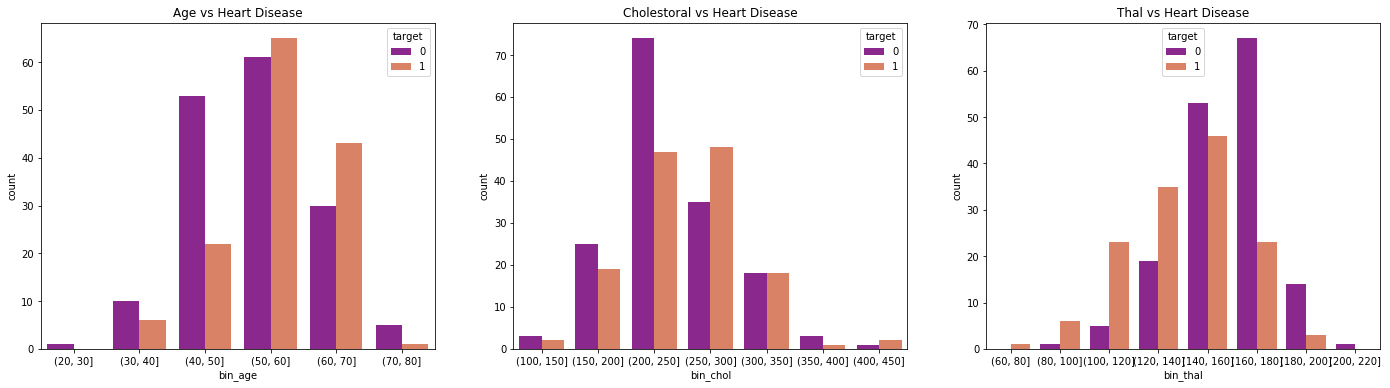

In [ ]:
fig,ax=plt.subplots(figsize=(24,6))
plt.subplot(1, 3, 1)
age_bins = [20,30,40,50,60,70,80]
df['bin_age']=pd.cut(df['age'], bins=age_bins)
g1=sns.countplot(x='bin_age',data=df ,hue='target',palette='plasma',linewidth=3)
g1.set_title("Age vs Heart Disease")

plt.subplot(1, 3, 2)
cho_bins = [100,150,200,250,300,350,400,450]
df['bin_chol']=pd.cut(df['cholesterol'], bins=cho_bins)
g2=sns.countplot(x='bin_chol',data=df,hue='target',palette='plasma',linewidth=3)
g2.set_title("Cholestoral vs Heart Disease")


plt.subplot(1, 3, 3)
thal_bins = [60,80,100,120,140,160,180,200,220]
df['bin_thal']=pd.cut(df['max_heart_rate_achieved'], bins=thal_bins)
g3=sns.countplot(x='bin_thal',data=df,hue='target',palette='plasma',linewidth=3)
g3.set_title("Thal vs Heart Disease")

The above graph describes the distribution of heart disease concerning age, cholesterol and thal values</br>

The people whose age is between 50-60 with cholesterol rate between 250-300 with thalassemia between 140-160 are prone to get heart disease.
</br>
Similarly, the below graph shows the relationship between the old peak with heart disease and depression rate with age.

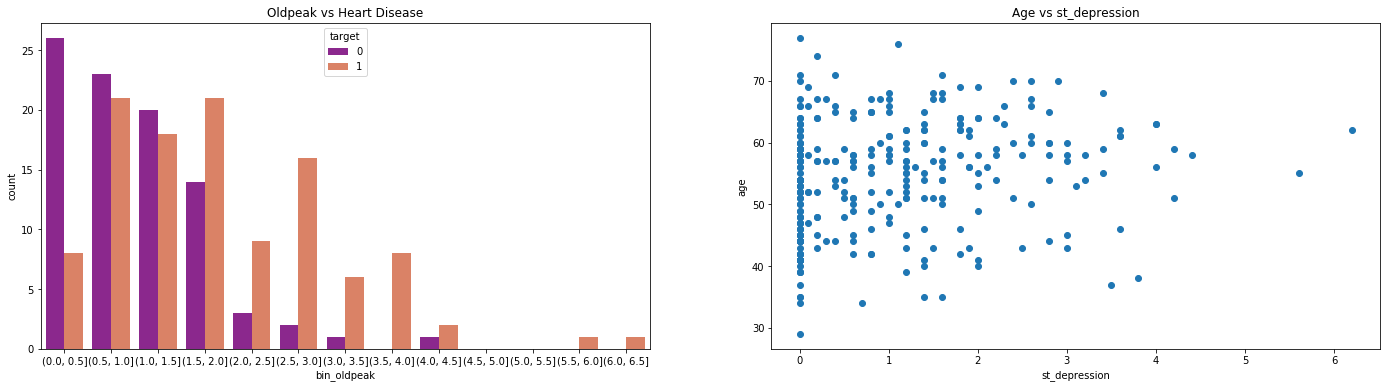

In [ ]:
fig,ax=plt.subplots(figsize=(24,6))
plt.subplot(1, 2, 1)
oldpeak_bins = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5]
df['bin_oldpeak']=pd.cut(df['st_depression'], bins=oldpeak_bins)
g3=sns.countplot(x='bin_oldpeak',data=df,hue='target',palette='plasma',linewidth=3)
g3.set_title("Oldpeak vs Heart Disease")

plt.subplot(1, 2, 2)
plt.title("Age vs st_depression")
plt.xlabel("st_depression")
plt.ylabel("age")
plt.scatter(df['st_depression'],df['age'])


#sns.countplot(x='st_depression',data=df,hue='target')

Let us know which gender is more prone to heart disease.



[[Text(0, 0, 'Female'), Text(0, 0, 'Male')]]

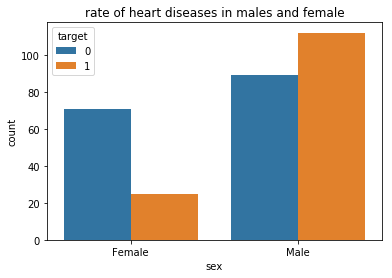

In [ ]:
fig, ax =plt.subplots()
g=sns.countplot(x='sex',data=df,hue='target')
g.set_title("rate of heart diseases in males and female")
ax.set(xticklabels=["Female","Male"])

# Males have the highest rate of heart diseases compared to the Females. 

Males are more prone to heart disease compared to females.


Let us see which type of chest pain is caused by a person who has heart disease.

[[Text(0, 0, 'typical angina'),
  Text(0, 0, 'atypical angina'),
  Text(0, 0, 'non-anginal pain'),
  Text(0, 0, 'asymptomatic')]]

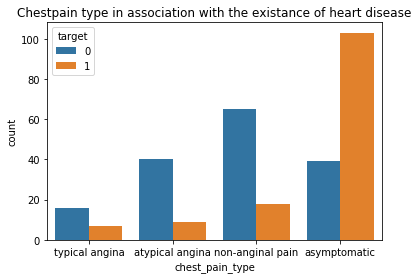

In [ ]:
fig, ax =plt.subplots()
g=sns.countplot(x='chest_pain_type',data=df,hue='target')
g.set_title("Chestpain type in association with the existance of heart disease")
ax.set(xticklabels=["typical angina","atypical angina","non-anginal pain","asymptomatic"])
#Maximum of heart diseases are caused by the chest pain of type 4 i.e asymptomatic

Therefore, asymptomatic is the pain that causes a person to have heart disease.

[[Text(0, 0, 'normal'),
  Text(0, 0, 'ST-T abnormality'),
  Text(0, 0, 'left-vent hypertrophy')]]

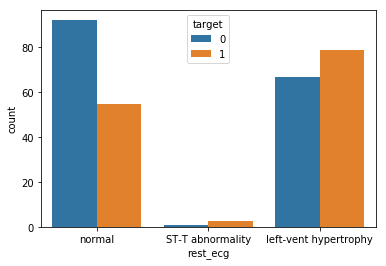

In [ ]:
fig, ax =plt.subplots()
sns.countplot(x='rest_ecg',data=df,hue='target')
g.set_title("Chestpain type in association with the existance of heart disease")
ax.set(xticklabels=["normal","ST-T abnormality","left-vent hypertrophy"])
# the people who has the ecg result as left ventricular hypertrophy has heart disease

From the above plot, we can say that the people with no disease have a normal ECG report, but the people who had the disease of target 1,2,3,4 had left ventricular hypertrophy.

Similarly, the below plot shows that the standard slope is usually flat when there is heart disease.

[[Text(0, 0, 'upsloping'), Text(0, 0, 'flat'), Text(0, 0, 'down sloping')]]

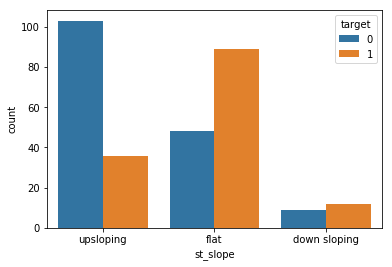

In [ ]:
fig, ax =plt.subplots()
g=sns.countplot(x='st_slope',data=df,hue='target')
g.set_title
("peak exercise ST segment with respect to the existance of heart disease")
ax.set(xticklabels=["upsloping","flat","down sloping"])
# When the slope of ecg is flat,there is a heart disease.

Let us check when the human body is active is it leading to heart disease or not.

[[Text(0, 0, 'no'), Text(0, 0, 'yes')]]

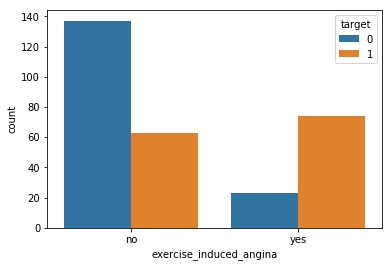

In [ ]:
fig, ax =plt.subplots()
g=sns.countplot(x='exercise_induced_angina',data=df,hue='target')
g.set_title
("exercise induced angina with respect to the existance of heart disease")
ax.set(xticklabels=["no","yes"])
# the exercise induced angina is highly yes for heart diseased patients


The angina pain caused by exercise is slightly more in the people who have heart disease.

Usually, fasting blood sugar causes heart problems. Let us see how much this factor is contributing to heart disease.


 

[[Text(0, 0, 'false'), Text(0, 0, 'true')]]

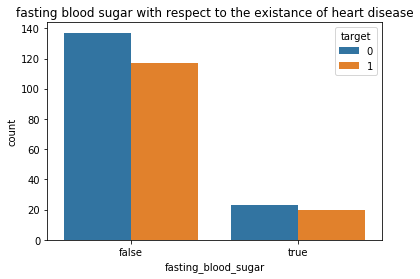

In [ ]:
fig, ax =plt.subplots()
g=sns.countplot(x='fasting_blood_sugar',data=df,hue='target')
g.set_title("fasting blood sugar with respect to the existance of heart disease")
ax.set(xticklabels=["false","true"])
# tend like there is a high probability of heart disease
#when the sugar levels are less than 120, which is unexpected finding

Surprisingly it is clear that there are people with high fasting blood sugar rate, but still, do not have heart disease. The chances are rare to have heart disease with this feature.

Let us see how fluoroscopy is coloring the heart valves when there is heart disease.

'Number of major vessels coloured by Flouroscopy with respect to the existance of heart disease'

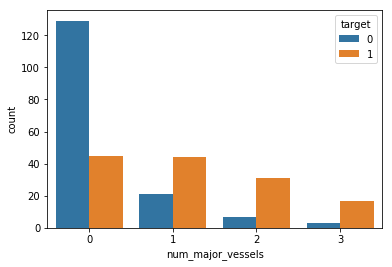

In [ ]:
fig, ax =plt.subplots()
g=sns.countplot(x='num_major_vessels',data=df,hue='target')
g.set_title
('Number of major vessels coloured by Flouroscopy with respect to the existance of heart disease')
# vessels 1,2,3 are coloured in case of heart disease.

 vessels 1,2,3 are coloured in case of heart disease.

let us see the thalassemia, which is the only hereditary feature of our dataset is representing the heart disease.

[[Text(0, 0, 'normal'),
  Text(0, 0, 'fixed defect'),
  Text(0, 0, 'reversable defect')]]

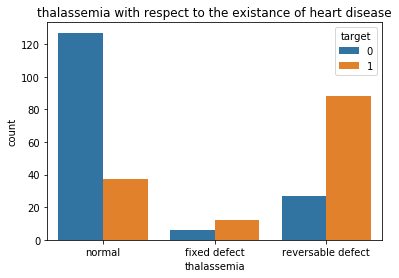

In [ ]:
fig, ax =plt.subplots()
g=sns.countplot(x='thalassemia',data=df,hue='target')
g.set_title("thalassemia with respect to the existance of heart disease")
ax.set(xticklabels=["normal","fixed defect","reversable defect"])
# Reversible defect thalassemia is highly correlated with the heart disease.
#Note: this is the only heriditary feature .

The reversible defect, which is one of the types of heart disease, is causing the highest cases of heart disease.

We need further comparision between continuous features and categorical features to better understand the dependent and independent variables.

[[Text(0, 0, 'false'), Text(0, 0, 'true')]]

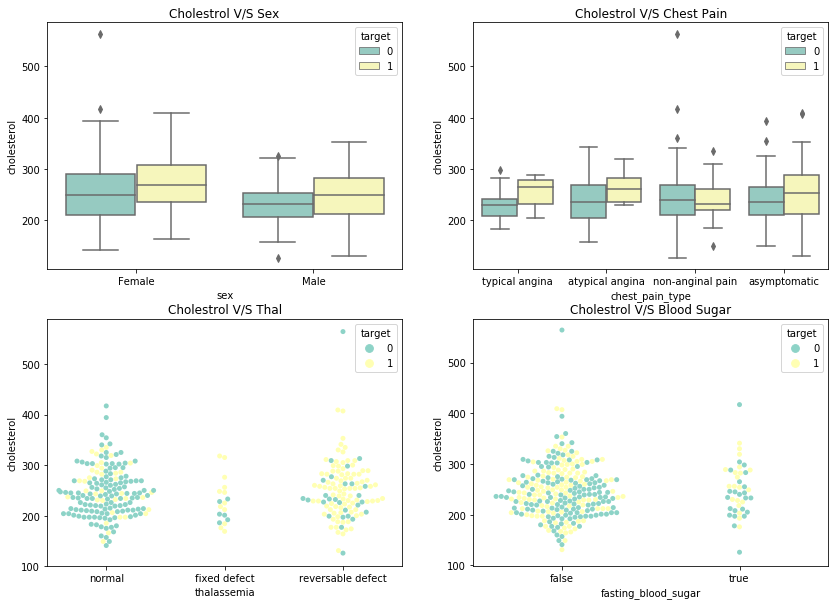

In [ ]:
# Usually cholesterol(continous value) leads to the heart disease. I need to find the pattern of cholesterol with sex, chestpain and thalassemia.
fig,ax=plt.subplots(2,2,figsize=(14,10))
sns.boxplot(y='cholesterol',data=df,x='sex',hue='target',palette='Set3',ax=ax[0,0])
ax[0,0].set_title("Cholestrol V/S Sex")
ax[0,0].set(xticklabels=["Female","Male"])

sns.boxplot(y='cholesterol',data=df,x='chest_pain_type',
            hue='target',ax=ax[0,1],palette='Set3')
ax[0,1].set_title("Cholestrol V/S Chest Pain")
ax[0,1].set(xticklabels=
        ["typical angina","atypical angina","non-anginal pain","asymptomatic"])

sns.swarmplot(y='cholesterol',data=df,
             x='thalassemia',hue='target',ax=ax[1,0],palette='Set3')
ax[1,0].set_title("Cholestrol V/S Thal")
ax[1,0].set(xticklabels=["normal","fixed defect","reversable defect"])

sns.swarmplot(y='cholesterol',data=df,
            x='fasting_blood_sugar',hue='target',ax=ax[1,1],palette='Set3')
ax[1,1].set_title("Cholestrol V/S Blood Sugar")
ax[1,1].set(xticklabels=["false","true"])

From the graph above, we can determine that females have the highest level of cholesterol compared to males, but males have the highest rate of heart diseases. Moreover, the increase in the cholesterol leads to chest pain of type 4 and reversible defect thalassemia.

The blood sugar and cholesterol combination are not much contributing to heart disease. 

Let us find the pattern between st_depression, chest_pain_type, and thalassemia.

[[Text(0, 0, 'Female'), Text(0, 0, 'Male')]]

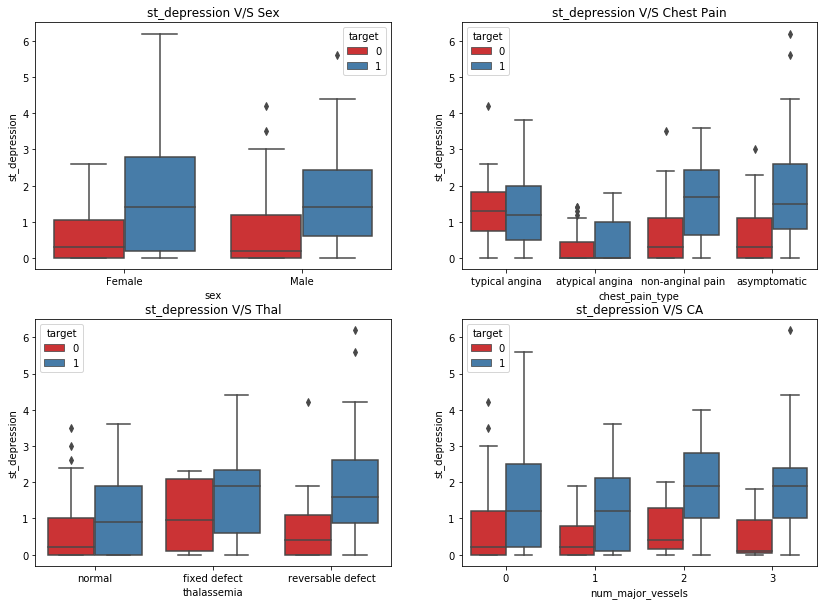

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title("st_depression V/S Sex")
sns.boxplot(y='st_depression',data=df,x='sex',hue='target',
            palette='Set1',ax=ax[0,0])
ax[0,0].set(xticklabels=["Female","Male"])

ax[0,1].set_title("st_depression V/S Chest Pain")
sns.boxplot(y='st_depression',data=df,x='chest_pain_type',
            hue='target',ax=ax[0,1],palette='Set1')
ax[0,1].set(xticklabels=["typical angina","atypical angina",
                         "non-anginal pain","asymptomatic"])

ax[1,0].set_title("st_depression V/S Thal")
sns.boxplot(y='st_depression',data=df,x='thalassemia',hue='target',
            ax=ax[1,0],palette='Set1')
ax[1,0].set(xticklabels=["normal","fixed defect","reversable defect"])

ax[1,1].set_title("st_depression V/S CA")
sns.boxplot(y='st_depression',data=df,x='num_major_vessels',
            hue='target',ax=ax[1,1],palette='Set1')
ax[0,0].set(xticklabels=["Female","Male"])




From the above graphs, we can conclude that st_depression in the range of 1.5 - 2.5 causes heart disease in males and females. Also, the higher the depression rate, the higher the pain. 
All in all, the essential factor is st_depression 

Next, let us will find the pattern between chest pain type and blood pressure.

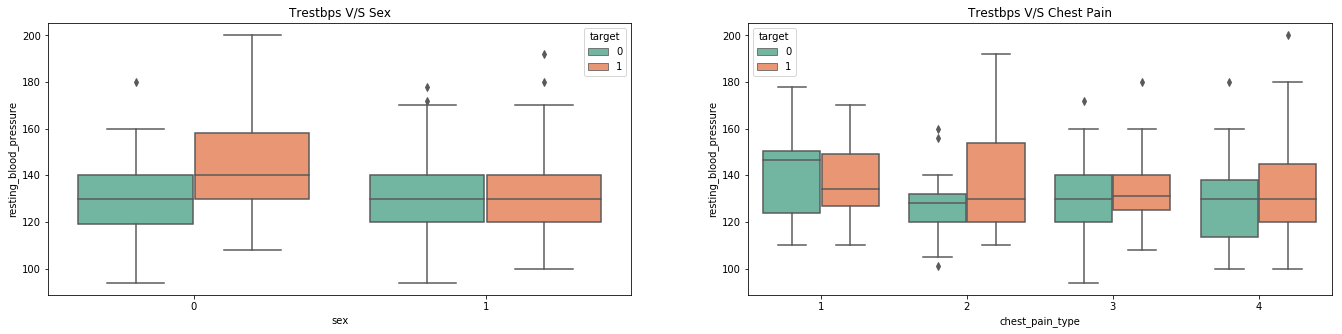

In [ ]:

fig,ax=plt.subplots(1,2,figsize=(23,5))
ax[0].set_title("Trestbps V/S Sex")
sns.boxplot(y='resting_blood_pressure',data=df,x='sex',hue='target',palette='Set2',ax=ax[0])

ax[1].set_title("Trestbps V/S Chest Pain")
sns.boxplot(y='resting_blood_pressure',data=df,x='chest_pain_type',hue='target',ax=ax[1],palette='Set2')




From the above graph, we can conclude that the blood pressure is high during the chest pain, and females have high blood pressure when they have heart disease.

In [ ]:
df.head()
#df.tail()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,bin_age,bin_chol,bin_thal,bin_oldpeak
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,"(60, 70]","(200, 250]","(140, 160]","(2.0, 2.5]"
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,"(60, 70]","(250, 300]","(100, 120]","(1.0, 1.5]"
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,"(60, 70]","(200, 250]","(120, 140]","(2.5, 3.0]"
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,"(30, 40]","(200, 250]","(180, 200]","(3.0, 3.5]"
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,"(40, 50]","(200, 250]","(160, 180]","(1.0, 1.5]"


Remember that we added bin features that act as intervals to visualize the distribution of age, cholesterol, and old peak. We need no longer need them, so let us delete them.

In [ ]:
df.drop(columns=["bin_age",	"bin_chol","bin_thal"], inplace=True)

Finally, in our analysis of the features, we confirm that all the features expect fasting blood sugar is contributing to determining the heart disease.

Also, box plots show that there is a large number of outliers in the data.


In [ ]:
df=df.drop(columns=['fasting_blood_sugar'])

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,1,145,233,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,2,172,0,1.4,1,0,3,0


Now the data has all the features for further analysis.



---

<h1><center>Assignment - 4</center></h1>

In this Assignment, we are going to apply some Machine Learning algorithms to solve the problem statement. The one which has the highest precision and best accuracy is selected as the best model for this dataset.

<h2>Determining a Model:</h2>

Clearly, from the problem statement, it is evident that it is a classification problem for the prediction of heart disease, i.e., prediction=0 means no heart disease, prediction =1 heart disease exists. Therefore, an appropriate Classification Model should be selected.

<h3> What is Classification Model ?</h3>
Classification is a supervised learning approach in which the computer learns from training data and uses this learning to predict one or more outcomes of a new observation.

There are two types of a classification model

1. Bi-class model: When the instances of the dataset are classified into only two classes.</br>
    E.g., The outcome of tossing a coin is either heads or tails.
    
2. Multi-class model: When the instances of the dataset are classified into more than two classes.</br>
    E.g., the grouping of teams into "Red," "Green," "Blue."
    
By looking at the target column in the dataset, we confirm that it is a **Bi-class model.**

By following the flow chart provided by Scikit learn for model selection. The following are the classification models selected.

1. Logistic Regression
2. Naive Bayes Classification
3. Linear SVC


Before starting with the exploration of each algorithm, let us look at the standard evaluation techniques used commonly in the classification models.

<h2>Evaluation Technique</h2>

To evaluate which model is best for this dataset, we use **Confusion Matrix** and **ROC and AUC** evaluation techniques. 

<h3>Confusion Matrix</h3>: This technique is extensively used in Machine Learning to describe the performance of a classification model. It is also known as **Error Matrix **. </br>

It is used to find the accuracy of the prediction of test data for which the actual values are known. The Confusion Matrix compares the correct values with the predicted values and then compute how many instances have been predicted correctly and how many instances are mispredicted. 

The block diagram of Confusion Matrix for Bi-class prediction [ref]:

![](https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png)




**Definition of terms:** </br>
P: Positive Observation </br>
N: Negative Observation </br>

TP: Observation from test data is Positive and prediction is also Positive </br>
FP: Observation from test data is Positive but the model has predicted it as Negative </br>

FN: Observation is Negative but the model predicted as Positive </br>
TN: Observation in the test data is Negative but it is predicted as Positive </br>

**Classification Rate:**

**Accuracy:**  How often the model predicts correctly is computed by finding the ratio of correctly predicted observations to the total number of observations.
 </br>
   $\frac{TP \, + \, TN} {TP \, + \, TN \, + \,FP \, + \,FN}$

</br>

**Recall:**  It is the ratio of the total number of positively classified to the total number of correctly classified. </br>
  $\frac{TP } {TP \, + \,FN}$
  
  </br>
  
  
  **Precision:** It is the ratio of the correctly predicted positive observations to the total predicted positive observations.</br>
  $\frac{TP } {TP \, + \,FP}$
  
  </br>
  
  **F1-Score:** It is an average of Precision and  Recall.
  F1 = 2 * (precision * recall) / (precision + recall) -------------------------eee---------------
  
  The above four measures should be computed for each classification model.
  


**<h3>ROC and AUC Evaluation:</h3>**
ROC is a plot of the true positive rate (on the y-axis) to the false positive rate( on the x-axis) for every possible classification which ranges from 0 to 1.</br>
We cannot see the thresholds which are used to generate the ROC curve </br>
If the classifier model wrongly predicts, then there will be a diagonal line instead of a curve between x and y axes.
</br>
AUC is the percentage of the curve between x and y axes.</br>
An inferior classifier model has the AUC of 0.5, which means that the model is guessing the predictions randomly.
</br>
If AUC = 1.0, it is considered as a perfect classifier.

<h2>Scaling the data</h2> 

when the features are not normally distributed, standardizing the data is a pervasive approach in Machine Learning. 

Note that we have categorical and continuous features in our dataset. We need to apply different scales based on their type. Therefore, we need to separate the categorical and continuous features and scale them individually.

**Continuous Features:**

In the heart-disease data set, we have observed that the features are not normally distributed. The **Standard Scaler** is used to normalize the data by transforming the mean of each feature to zero and variance to 1.

**Categorical Features:**

These features should be converted into a format such that it will be easy for our classification model to predict the outcome. Not all the algorithms can fit the categorical data directly. Therefore, we need to convert the categorical data into a numerical format using **One-hot encoder**.  In this scaling, an additional feature for each category is added to the dataset.

E.g., if a feature has three categories, 3,9,7 this feature will create three more features feature_3, feature_9 and feature_7. If the instance belongs to category 3, feature_3 contains 1, and other categorical-features will contain 0.

The One-hot encoder does this work for us.

In [ ]:
"""Storing the target column in a variable and dropping fast.blood sugar as we 
no longer need it"""
data_label= df['target']
df=df.drop(columns=['target'])
data_label=pd.DataFrame(data_label)

data_label.head()

,target
0,0
1,1
2,1
3,0
4,0


In [ ]:
"""Seperating the categorical and numerical data"""
numerical_Data=df.select_dtypes(include=[np.float64,np.int64])
categorical_Data=df.select_dtypes(include=[object])

Pandas have an equivalent method for One-hot encoding i.e. pd.get_dummies. This method has the same functionality as on-hot encoding.

In [ ]:
categorical_Data=pd.get_dummies(categorical_Data,drop_first=True)
categorical_Data.shape

(297, 14)

In [ ]:
# Converting numerical data into standard scalar

scaler = StandardScaler()
#scaler.fit(numerical_Data)


data_scaled=scaler.fit_transform(numerical_Data)
#data_scaled=scaler.transform(numerical_Data)
numerical_Data=pd.DataFrame(data=data_scaled, columns=numerical_Data.columns)

print(numerical_Data.shape)
print(data_label.shape)
numerical_Data.tail()




(297, 5)
(297, 1)


,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression
292,0.272059,0.468418,-0.122330,-1.161395,-0.734914
293,-1.056185,-1.223355,0.320744,-0.768432,0.124076
294,1.489615,0.693988,-1.047008,-0.375469,2.013854
295,0.272059,-0.095506,-2.241384,-1.510696,0.124076
296,0.272059,-0.095506,-0.218651,1.065396,-0.906712


In [ ]:
dataset=numerical_Data.merge(categorical_Data,
                             left_index=True,right_index=True,how = "right")
dataset= dataset.merge(data_label,
                       left_index=True,right_index=True,how = "right")
dataset.dropna(inplace=True)

data_label=pd.DataFrame(dataset['target'],index = dataset.index)
dataset.drop(columns=['target'],inplace=True)

dataset.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,sex_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,rest_ecg_1,rest_ecg_2,exercise_induced_angina_1,st_slope_2,st_slope_3,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,thalassemia_6,thalassemia_7
0,0.936181,0.750380,-0.276443,0.017494,1.068965,1,0,0,0,0,1,0,0,1,0,0,0,1,0
1,1.378929,1.596266,0.744555,-1.816334,0.381773,1,0,0,1,0,1,1,1,0,0,0,1,0,0
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1,0,0,1,0,1,1,1,0,0,1,0,0,1
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,1,0,1,0,0,0,0,0,1,0,0,0,0,0
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,0,1,0,0,0,1,0,0,0,0,0,0,0,0


Now that the data is in the required format, let us split the data into training and test data for model learning and training purposes.

<H2>Preparation of Training and Testing data:</H2>

Now that the data is in the required format, let us split the data into a training set and testing set. The data should be divided in such a way that training features and the outcome of the target for these training features are stored separately, similarly, for the testing features and testing outcomes. The scikit learn module has a method called train_test_split, which split the data according to our requirement.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, 
                                      data_label,test_size=0.3, random_state=5)

#test_size = 0.3, 30 percent of the data is assigned to test and 
# the remianing 70 percent of the data is assigned to training set.

X_train.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,sex_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,rest_ecg_1,rest_ecg_2,exercise_induced_angina_1,st_slope_2,st_slope_3,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,thalassemia_6,thalassemia_7
200,1.046868,0.468418,1.264686,-0.724769,-0.734914,0,0,0,1,0,1,0,0,0,0,0,0,0,0
94,-0.281376,-0.208291,0.147367,0.497783,-0.906712,0,0,1,0,0,1,0,0,0,0,0,0,0,0
237,-1.498933,-1.223355,-0.237915,0.148482,-0.906712,1,0,0,1,0,1,0,0,0,0,0,0,0,1
154,1.710989,-0.095506,1.438063,-1.772671,1.154864,1,0,0,1,0,1,1,0,1,1,0,0,0,0
28,-1.277559,1.032342,-0.006746,0.934409,0.381773,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(X_train.shape,X_test.shape)

#incase if there are any NaN values in the dataset, replace them with the mean.

X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


(204, 19) (88, 19)


<h2>Implementation of Classification Models:</h2>


<h3>1. Logistic Regression</h3>

This algorithm is one of the simple and widely used classification algorithms. It is a descendent of Linear Regression. </br>
Logistic Regression(Navlani, 2018) is applied 
for </br>binary and multi-class classification problems unlike Linear Regression, which focuses only on the continuous data

We use this algorithm to perform the bi-class prediction, i.e., predict if there is heart disease(1), or there is no disease(0).

Logistic Regression predicts the probability of occurrence of a class using the Sigmoid Function. </br>This sigmoid function is applied to the equation of Linear Regression.

Linear Regression Equation:
 
 y= $${\beta_0x_0 +\beta_1x_1+\beta_2x_2....+\beta_nx_n }$$


Where y is an independent variable/outcome and X1, X2,.........Xn is the explanatory variable.

Sigmoid Function:

$$\frac {1}{1+e^{-y}}$$


The sigmoid function is known as a Sigmoidal Curve or Logistic Function. It is a mathematical function that has an "S"-shaped curve. This function on the Linear Regression and the following equation is formed.

p=$$\frac {1}{1+e^{-\beta_0x_0 +\beta_1x_1+\beta_2x_2....+\beta_nx_n }}$$

The above equation makes the regression model predict the category.

The "S" shaped curve is shown below:
![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

The Sigmoid function can take only real-value numbers and map it to the value between 0 and 1. 

If the output of the function is above 0.5, then the outcome is predicted as 1 or "Yes."

If the output of the function is less than 0.5, then the outcome is predicted as 0 or "No."

Assumptions of this model:

1. The target variable must be binary

2. The features in the dataset should be independent of each other.

3. The predictive feature should be categorical.

4. The dependent variable follows Bernoulli Distribution.

The implementation is shown below.


In [ ]:

#create a logistic regression model
logreg = LogisticRegression()

#training the model using fit method
logreg.fit(X_train, y_train)

# predict the outcome of the test ata
y_pred = logreg.predict(X_test)

# Now we need to check how well the model understood the training data 
score = logreg.score(X_train, y_train)
print("Score of training data ",score)

# Now we need to check how well the model understood the test data 
score = logreg.score(X_test, y_test)
print("Score of test data ",score)


Score of training data  0.8382352941176471
Score of test data  0.8636363636363636


We can see that the score of training and test data are very close. 
Now, let us evaluate the test data.

In [ ]:
# as discussed in the evaluation metrics, find
"""
1. Accuracy
2. Precision
3. Recall
4. F1-Score
"""
print("Accuracy ",metrics.accuracy_score(y_test, y_pred))

print("Prediction ",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1-Score", f1_score(y_test,y_pred))


Accuracy  0.8636363636363636
Prediction  0.918918918918919
Recall: 0.7906976744186046
F1-Score 0.85


Now lets look at the confusion matrix:

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[42,  3],
       [ 9, 34]])

By looking at the confusion matrix, we can say that. 


*   Forty Two instances which are positive are predicted positively 
* three instances which are in positive class are predicted negatively
* nine instances which are in negative class are predicted positively 
*   Thirty Four instances are predicted negative which are negative

We have very fewer errors in this model.

Let us plot the ROC and AUC curve:

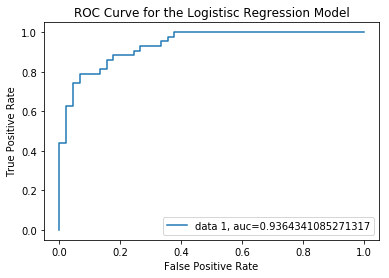

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.title('ROC Curve for the Logistisc Regression Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

From the above plot, we can see that the AUC value is 0.93, which is nearly equal to 1.0. This value proves that it is an excellent model for classification.

<h3>Plotting the Predicted Values:</h3>
As we have 19 features and one target feature, we cannot scatter plot all the features of the training data. The best way to visualize is through a confusion matrix.
Let us plot the confusion matrix here.

Text(0.5, 15.0, 'Predicted label')

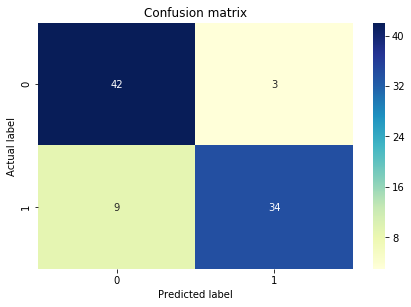

In [ ]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h3>2. Naive Bayes Classification:</h3>

This algorithm(Navlani, 2018) is an intuitive method that uses probabilities based on the Bayes Theorem to predict the data.</br>
It is a supervised learning method based completely on the probabilities. </br>

Given the value of an attribute, the probability of a class value is predicted correctly with the help of conditional probability. </br>

During prediction, we calculate the probabilities of each instance belonging to each class. Finally, select the class which as the highest probability. 

Conditional Probability of heart-disease and no-heart-diesease are: </br>

$$P(HeartDisease \, | \, Features) = \frac{P(Features \, | \, HeartDisease) \, (P(HeartDisease))} {P(Features)}$$

</br>

$$P(NoHeartDisease \, | \, Features) = \frac{P(Features \, | \, NoHeartDisease) \, (1-P(HeartDisease))} {P(Features)}$$


Assumptions:
1. Even if there is any dependency between the features, the algorithm considers them as an independent.
2. A normal distribution of numerical data.
3. Each feature has equal weight


In [ ]:
#Creating a Naive Bayes Model
gnb = GaussianNB()

#fit the training data so that the model learns it
gnb.fit(X_train, y_train)

# predict the outcome
y_pred = gnb.predict(X_test)

Let us now evaluate the outcome with actual values.

In [ ]:
print("Accuracy ",metrics.accuracy_score(y_test, y_pred)*100)

print("Prediction ",metrics.precision_score(y_test, y_pred)*100)

print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1-Score", f1_score(y_test,y_pred))

Accuracy  84.0909090909091
Prediction  91.42857142857143
Recall: 0.7441860465116279
F1-Score 0.8205128205128205


All the above values are less when compared to the Logistic Regression Classification Metrics.

Let us look at the ROC and AUC curve.



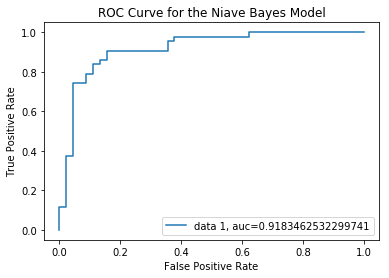

In [ ]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.title('ROC Curve for the Niave Bayes Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.legend(loc=4)
plt.show()

The AUC score is pretty good for this model and equal to the Logistic Regression's AUC score.</br>

Let us plot the Confusion Matrix for this model.

Text(0.5, 15.0, 'Predicted label')

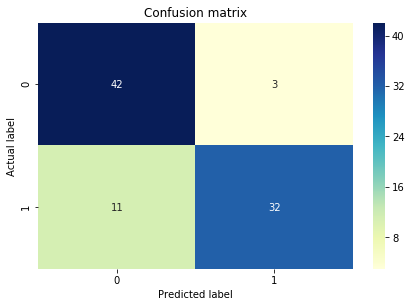

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<H3>3. Linear SVC</H3>

A Scalar Vector Machine (SVM) is a supervised classifier(SVC) algorithm(Navlani, 2018) which surpasses the accuracy of Logistic Regression and Decision Tress Classifiers. </br>

It makes use of the kernel parameter, which is for classifying non-linear data. This kernel creates a hyperplane in multi-dimensional space to separate binary or multi-class of data. A hyperplane is called a Maximum Marginal Hyperplane when it effectively divides the classes in a data set. </br>

However, this model does iteratively finds the best fit hyperplane.

The data points plotted on the X-axis, and Z-axis( sum of x squared and y-squared) is shown below: </br>

$${Z^{2}} = {X^{2}}+{Y^{2}} $$

![](https://www.researchgate.net/profile/Xiaoou_Tang/publication/6992544/figure/fig1/AS:277855356375049@1443257287435/SVM-for-a-linearly-separable-binary-classification-problem_W640.jpg)


As we can see in the above diagram, hyperplane acts as a decision boundary.

Margin: It is the distance between the closest point of each class from the hyperplane. If the distance is too small, then the model is trying to overfit for the classification. If the distance is high, then it is considered as a good model.

Support Vectors: These are the nodes/data points that are closer to the hyperplane.

The accuracy depends upon the type of kernels used for creating SVM. Kernel transforms the data from low-dimensional space to high dimension.

There are three types of kernels: </br>
1. Linear Kernel: This kernel is used when only a single hyperplane is used to separate the classes in the data.

2. Polynomial Kernel: This kernel is used to draw the curved hyperplane.

3. Radial Basis Function Kernel: This kernel is used to map the data into infinite-dimensional space.


In our project, we make use of Linear kernel since we have only two classes in or target.
The implementation is shown below.





In [ ]:
from sklearn.svm import SVC
classifier =SVC(kernel="linear",probability=True)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy ",metrics.accuracy_score(y_test, y_pred)*100)

print("Prediction ",metrics.precision_score(y_test, y_pred)*100)

print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1-Score", f1_score(y_test,y_pred))



Accuracy  86.36363636363636
Prediction  94.28571428571428
Recall: 0.7674418604651163
F1-Score 0.8461538461538461


Area under the ROC curve  0.9198966408268734


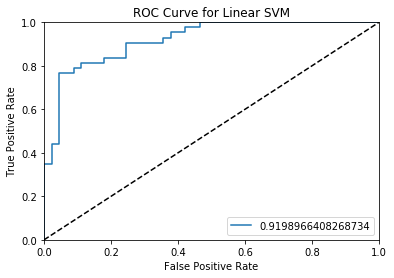

In [ ]:
from sklearn.metrics import roc_curve, auc
import pylab as pl


probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve ", roc_auc)

plt.clf()
plt.plot(fpr, tpr, label=roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Linear SVM')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 15.0, 'Predicted label')

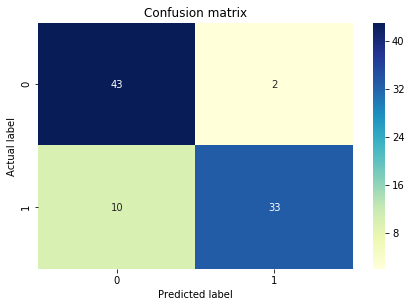

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

From the high Score, we can see that the Accuracy score of linear SVC and Logistic Regression is the same. However, the prediction rate of Linear SVC is higher. 
The accuracy is not rising above 86 percent. Therefore, out of the three models we created, LInear SVC is the best model for predicting heart disease.

<h2>Extrapolation and Interpolation:</h2>

Extrapolation: fitting an instance that is out of the range from the actual instances and tests the outcome of it.

Interpolation: Test the model by creating a fictional instance that lies in the range of the data.


For analyzing the performance of the model, let us create a fictional instance first.

We have an issue with scaling here, as we are making our test and train data to go through standard scalar. The classification models are trained on the scaled data. </br>
Similarly, our interpolation and extrapolation data should also go through scaling, and then we should predict their outcome. </br>

For this purpose, let us create a function called predict_Fictional_Data(X_Fictional, X_Categorical) which takes the numerical and categorical features of the fictional instance. 

For scaling this fictional data,  the original data needs to be appended with this fictional data. After scaling the overall data, the fictional data row is extracted from the original data frame and passed to the predict function of the model.

In [ ]:
def predict_Fictional_Data(X_Fictional,X_Categorical):
 
  numerical_Data=df.select_dtypes(include=[np.float64,np.int64])
  
  X_Fictional=pd.DataFrame(X_Fictional,
                         columns = numerical_Data.columns)
  
  numerical_Data= numerical_Data.append(X_Fictional,
                                      ignore_index = True)
  
  # Converting numerical data into standard scalar

  scaler = StandardScaler()
  #scaler.fit(numerical_Data)


  data_scaled=scaler.fit_transform(numerical_Data)

  numerical_Data=pd.DataFrame(data=data_scaled, columns=numerical_Data.columns)

  numerical_Data.tail()
  
  X_Fictional=numerical_Data.loc[[len(numerical_Data)-1]]
  
  X_Categorical=pd.DataFrame(X_Categorical,
                         columns = categorical_Data.columns)
  
  X_Fictional.reset_index(drop=True, inplace=True)

  X_Fictional=pd.concat([X_Fictional,X_Categorical],axis=1)
  
  cols = [col for col in X_Fictional.columns if col not in ['age',
                     'cholesterol',
                     'max_heart_rate_achieved', 'st_depression',
            'resting_blood_pressure']]
  
  for col in cols:
    X_Fictional[col] = X_Fictional[col].astype('object')
  
  print("Prediction of Logistic Regression Model: ",logreg.predict(X_Fictional))
  print("Prediction of Naive Bayes Model: ",gnb.predict(X_Fictional))
  print("Prediction of Linear SVC Model: ",classifier.predict(X_Fictional))
  
   

Let us first start with interpolation data, which contains the chest pain type 1 for age 63 since most of the people who have chest pain of type 1 are prone to be having heart disease from our analysis. This data should predict one, i.e., heart disease as per our understanding of the data.


In [ ]:
predict_Fictional_Data([[63,145,233,150,2.3]],[[1,0,0,0,0,1,0,0,1,0,0,0,1,0]])

Prediction of Logistic Regression Model:  [0]
Prediction of Naive Bayes Model:  [1]
Prediction of Linear SVC Model:  [0]


Only the Naive Bayes Model has predicted accurately.

Let us give an extrapolated data of high thalassemia of 210, which is greater than the max value present in the data set. Even if there is a high thal value, there are chances of having no heart disease.

In [ ]:
predict_Fictional_Data([[44,130,250,210,0.4]],[[1,0,1,0,0,0,1,0,0,0,0,0,0,0]])

Prediction of Logistic Regression Model:  [0]
Prediction of Naive Bayes Model:  [0]
Prediction of Linear SVC Model:  [0]



This experiment can be predicted easily by all the models since the thal value is not only a deciding factor for heart disease. In the data, there is an instance with a thal value of 195 and high cholesterol, and that person does not have heart disease. We can accept the output of all the three models.

Let us predict another interpolation data with the same data used previously for males. Let us change the sex type to female and test the outcome. It should be predicting the existence of heart disease.

In [ ]:
predict_Fictional_Data([[63,145,233,150,2.3]],[[0,0,0,0,0,1,0,0,1,0,0,0,1,0]])

Prediction of Logistic Regression Model:  [0]
Prediction of Naive Bayes Model:  [1]
Prediction of Linear SVC Model:  [0]


Again, we can see that the Naive Bayes Model can predict heart disease correctly compared to the other models.

Therefore, we can say that due to a large number of outliers in the data, the prediction of having a heart disease is possible only with additional information. 

---



<H2>Summary</H2>

We have started with the analysis of the factors which can contribute to having a heart disease for feature selection. From the result of our analysis, we confirmed that the rate of blood sugar does not contribute to heart disease, so we delete it. Finally transformed the data into a format that can be understood by the classifier algorithms. 
Our goal was to predict a heart disease with a given set of features by applying Machine Learning algorithms. We identified that this is a classification problem and applied Logistic Regression, Nave Bayes Classifier, and Linear SVC algorithms for the heart disease prediction.

Although Liner SVC has given the highest accuracy in the prediction of heart disease on the test data, it failed to predict the interpolation and extrapolation data. Only Naive Bayes among the three algorithms could rightly classify the prediction for interpolation and extrapolation data.

Thus we conclude that the Naive Bayes Classifier is the best model to predict the heat disease.


There are many outliers in the data. The analysis of outlier detection could fetch more accurate results on heart disease prediction.

The take away from this analysis is that the numerical data and categorical data should be analyzed and scaled differently and  PCA or any other dimensionality reduction algorithms cannot be applied for visualizing the prediction of a bi-class target since it causes the data loss. The best way to visualize the results of a classifier problem is by using a ROC curve and Confusion Matrix.

**References:**

Bhf.org.uk. (2019). Risk factors. [online] Available at: https://www.bhf.org.uk/informationsupport/risk-factors [Accessed 16 Aug. 2019]. </br>

www.heart.org. (n.d.). Understand Your Risks to Prevent a Heart Attack. [online] Available at: https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack [Accessed 13 Aug. 2019].
</br>
Navlani, A. (2018). Understanding Logistic Regression in Python. [online] DataCamp Community. Available at: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python [Accessed 19 Aug. 2019].</br>

Navlani, A. (2018). Support Vector Machines in Scikit-learn. [online] DataCamp Community. Available at: https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python [Accessed 19 Aug. 2019].
</br>
Navlani, A. (2018). Naive Bayes Classification using Scikit-learn. [online] DataCamp Community. Available at: https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn [Accessed 19 Aug. 2019].

